In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from src.paths import processed_data_path,repo_path

In [5]:
#IMAU Data
ds_imau = xr.open_dataset(f'{processed_data_path}IMAU_Output/imau_station_data.nc')
ds_imau = ds_imau.rename({'zs':'cum_ele'})
#CFM Output
results_path = f'{repo_path}CFM_Lancaster/results/reformatted_output/Single_Dimension_CFM_Output.nc'
ds_single_dimension_outputs = xr.open_dataset(results_path)

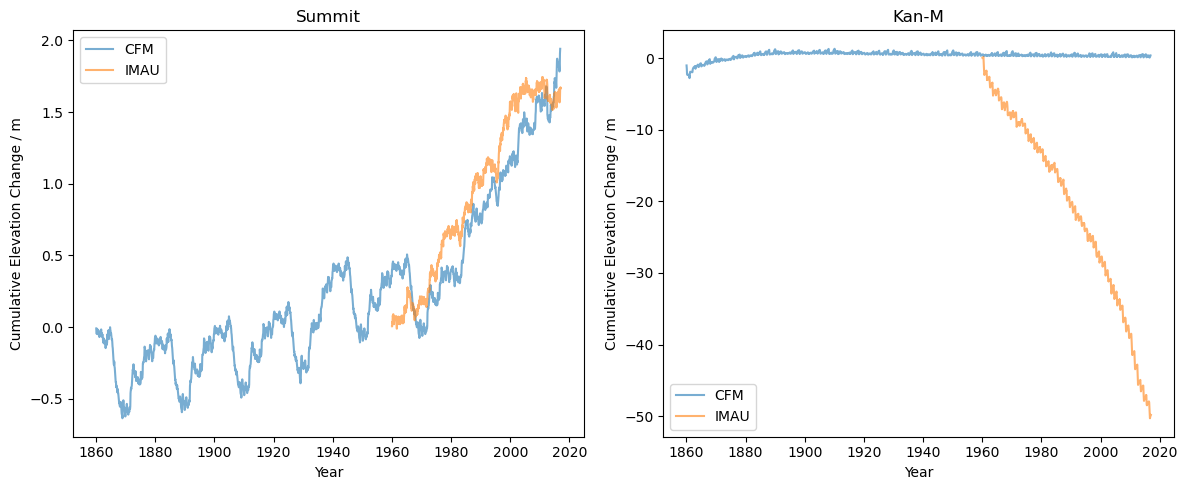

In [6]:
stations = ['Summit','Kan-M']
output = 'cum_ele'
output_fullname = 'Cumulative Elevation Change / m'

fig, subplots = plt.subplots(1, 2,figsize=(12,5))
for ax,station in zip(subplots.flat,stations):
    ds_single_dimension_outputs[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='year',alpha=0.6,ax=ax,label='CFM')
    ds_imau[output].isel(time=slice(1,None)).sel(station=station).plot.line(x='time',alpha=0.6,ax=ax,label='IMAU')
    ax.set_title(station)
    ax.set_ylabel(output_fullname)
    ax.set_xlabel('Year')
    ax.legend()
fig.tight_layout()